In [1]:
import bd
import pickle
import numpy as np
from Point import Point
from Limb import Limb

from sklearn.neighbors import LSHForest

import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
#constants
ratio = 2
black = (0,0,0)
red = (1,0,0)
width, height = 1000, 1000

#to keep
l_arm = True
r_arm = True
l_leg = True
r_leg = True
neck = True
general = True

to_keep = [l_arm, r_arm, l_leg, r_leg, neck, general]

In [3]:
myPaintings = pickle.load(open('../../Python Scripts/myPaintings21400.p', 'rb'))[:21401]


## HERE go buc corrections to the catalog, which are numerous.... 
myPaintings[7465][1] = 'http://www.wga.hu/art/c/casa/portrait_C.jpg' ## and NOT portrait_c (lowercase), the original...

filtered_paintings = bd.filter_paintings(myPaintings)

print len(myPaintings)
print len(filtered_paintings)

21401
14896


In [4]:
#6 seconds in my computer
all_bodies = bd.construct_body_list(len(filtered_paintings)-1, filtered_paintings)
filtered_bodies = bd.filter_bodies(all_bodies)

print len(all_bodies)
print len(filtered_bodies)

67720
48689


In [5]:
all_relative_angles = bd.all_relative_angles(filtered_bodies)
deviation = bd.compute_std_deviation(all_relative_angles)

In [6]:
ll = bd.all_bodies_mean_limb_length(filtered_bodies)  * np.array(ratio)
ml = bd.middle_mean_length(filtered_bodies) * ratio

In [7]:
resized_bodies = bd.resize_bodies(filtered_bodies, ml)

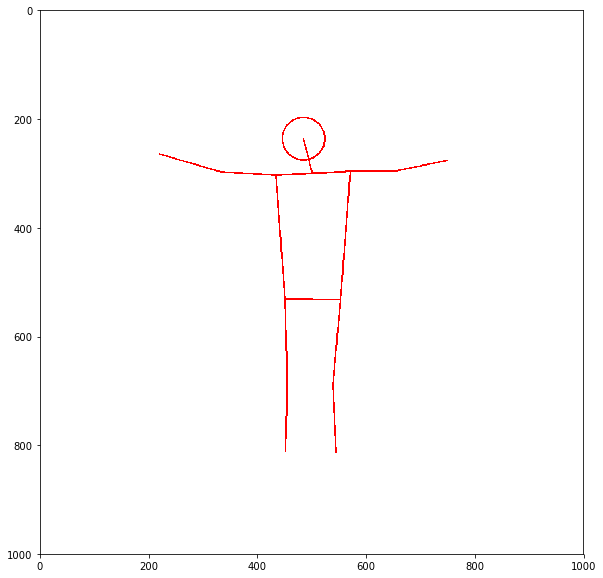

In [8]:


body_id = 2659
img = np.ones((height, width, 3))


resized_bodies[body_id].draw(img, red)


plt.imshow(img)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10)

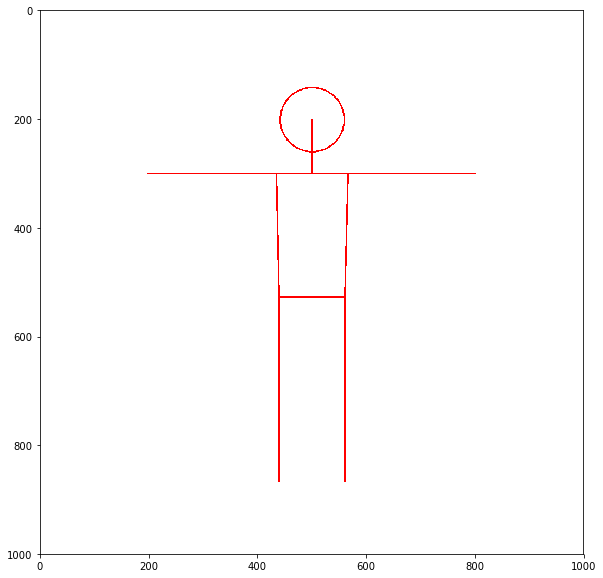

In [9]:
img = np.ones((height, width, 3))
base_body = bd.angles_to_body(bd.angles(), ll, Point(500,300))

base_body.rotate(0)
base_body.draw(img, red)


plt.imshow(img)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10)

In [10]:
d,i = bd.get_n_nearest_neighbor(all_relative_angles, base_body, deviation, to_keep, n=100, dist=50)
print i

8.58700013161
0.763000011444
[[ 2659 11928 39479 45818 22121 29589  2578  3537 28948  2577 15067 36837
  39338 23681  7425 23603  2716 41457 47479  8785 46086 36838 43378 37647
  29640 28463  7181 18441   564 21085  1765 17179 42853 25283  1774  1000
  17377 27084 36946  2723  1768  3784 36993 31678  7150 22570 22044  9606
   3508 12018  7600 32584 14604 45615 12211  4472  1204  2750 29347  3785
  27225  2529 37058 20687 43770  2763 18569 11685 41393 36842 17088   817
  38121 27195 44461 37645 35864  7847  3779 30047 45577  6958 15075  8641
  42855 23367 36964 17068   768 45534 11250 14907 44319  2765 10296  2404
  23346 31483 22532 45033]]


In [11]:
#to change the number of random paintings, change n
import time
n = 100
t = time.time()
bd.p_values_random_hypothesis(n, filtered_paintings, filtered_bodies, all_relative_angles, deviation, approx=True)
print time.time() -t

C:\Users\bruno\Anaconda3\envs\py27\lib\site-packages\sklearn\random_projection.py:376: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (10 < 32).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)


11.3489999771


In [16]:
import bqplot as bqp


def interactive_body(body, l_arm = True, r_arm = True, l_leg = True, r_leg = True, neck_p = True):
    """Plot an interactive body with which we can play."""
    
    middle = Limb(body.pts[9], body.pts[13]).middle()
    to_keep=list()
    to_keep2 = list()
    if l_arm:
        to_keep.append(body.pts[3].to_array())
        to_keep.append(body.pts[4].to_array())
    if r_arm:
        to_keep.append(body.pts[7].to_array())
        to_keep.append(body.pts[8].to_array())
    if l_leg:
        to_keep.append(body.pts[10].to_array())
        to_keep.append(body.pts[11].to_array())
    if r_leg:
        to_keep.append(body.pts[14].to_array())
        to_keep.append(body.pts[15].to_array())
    if neck_p:
        to_keep.append(body.pts[0].to_array())
    if general:
        to_keep2.append(middle.to_array())
        
    def refresh_rot(_):
        middle = Limb(body.pts[9], body.pts[13]).middle()
        if (not abs(scat2.x[0] - scat3.x[0]) < 15) or not (abs(scat2.y[0] - scat3.y[0])<15):
            o = body.pts[1]
            a = Point(scat2.x[-1], scat2.y[-1]).angle(o) - middle.angle(o)
            body.rotate(a)
            
            middle = Limb(body.pts[9], body.pts[13]).middle()
            
            i = 0
            if l_arm:
                to_keep[i] = body.pts[3].to_array()
                to_keep[i+1] = body.pts[4].to_array()
                i+=2
            if r_arm:
                to_keep[i] = body.pts[7].to_array()
                to_keep[i+1] = body.pts[8].to_array()
                i+=2
            if l_leg:
                to_keep[i] = body.pts[10].to_array()
                to_keep[i+1] = body.pts[11].to_array()
                i+=2
            if r_leg:
                to_keep[i] = body.pts[14].to_array()
                to_keep[i+1] = body.pts[15].to_array()
                i+=2
            if neck_p:
                to_keep[i] = body.pts[0].to_array()
                i+=1
            if general:
                to_keep2[0] = [scat2.x[0], scat2.y[0]]
            
            scat.x , scat.y = np.transpose(to_keep)
            scat2.x, scat2.y = np.transpose(to_keep2)
            scat3.x, scat3.y = scat2.x, scat2.y
            
            
    def refresh(_):
        
        
        chest.x, chest.y = np.transpose([body.pts[1].to_array(), body.pts[2].to_array(), body.pts[9].to_array(), \
                                     body.pts[13].to_array(), body.pts[6].to_array(), body.pts[1].to_array()])
        
        i = 0
        to_update = []
        if l_arm:
            left_arm.x, left_arm.y = [[body.pts[2].x, scat.x[i], scat.x[i+1]],[body.pts[2].y, scat.y[i], scat.y[i+1]]]
            to_update.append(3)
            to_update.append(4)
            i+=2
        if r_arm:
            right_arm.x, right_arm.y = [[body.pts[6].x, scat.x[i], scat.x[i+1]],[body.pts[6].y, scat.y[i], scat.y[i+1]]]
            to_update.append(7)
            to_update.append(8)
            i+=2
        if l_leg:
            left_leg.x, left_leg.y = [[body.pts[9].x, scat.x[i], scat.x[i+1]],[body.pts[9].y, scat.y[i], scat.y[i+1]]]
            to_update.append(10)
            to_update.append(11)
            i+=2
        if r_leg:
            right_leg.x, right_leg.y = [[body.pts[13].x, scat.x[i], scat.x[i+1]],[body.pts[13].y, scat.y[i], scat.y[i+1]]]
            to_update.append(14)
            to_update.append(15)
            i+=2
        if neck_p:
            to_update.append(0)
            neck.x, neck.y = [[body.pts[1].x, scat.x[i]],[body.pts[1].y, scat.y[i]]]
            
        
        head.x = np.cos(np.linspace(0, 2*np.pi, 100))*60+body.pts[0].x
        head.y = np.sin(np.linspace(0, 2*np.pi, 100))*65+body.pts[0].y
        
        
        #update body
        for i in range(len(to_update)):
            body.pts[to_update[i]].x = scat.x[i]
            body.pts[to_update[i]].y =  scat.y[i]
        

        
        return
    
    
    
    scales = {'x': bqp.LinearScale(min= 0, max= 1000),
             'y' : bqp.LinearScale(min = 1000, max = 0)}
    
    marks = []
    
   
    
    #movable points: arms first, left side first
    scat = bqp.Scatter(scales = scales, enable_move = True, update_on_move = True, stroke_width = 7)
    scat.x , scat.y = np.transpose(to_keep)
    scat2 = bqp.Scatter(scales = scales, enable_move = True, update_on_move = True, stroke_width = 7)
    scat2.x , scat2.y = np.transpose(to_keep2)
    scat3 = bqp.Scatter(scales = scales, enable_move = False, update_on_move = False, stroke_width = 0)
    scat3.x , scat3.y = scat2.x, scat2.y
    
    marks.append(scat)
    marks.append(scat2)
    #marks.append(scat3)
    
    #draw the chest
    chest = bqp.Lines(scales=scales)
    chest.x, chest.y = np.transpose([body.pts[1].to_array(), body.pts[2].to_array(), body.pts[9].to_array(), \
                                     body.pts[13].to_array(), body.pts[6].to_array(), body.pts[1].to_array()])
    marks.append(chest)
    
    
    #draw the head
    head = bqp.Lines(scales=scales)
    head.x = np.cos(np.linspace(0, 2*np.pi, 100))*60+body.pts[0].x
    head.y = np.sin(np.linspace(0, 2*np.pi, 100))*65+body.pts[0].y
    marks.append(head)
    
    i = 0
    #draw the left arm
    left_arm = bqp.Lines(scales=scales)
    if l_arm:
        left_arm.x, left_arm.y = [[body.pts[2].x, scat.x[i], scat.x[i+1]],[body.pts[2].y, scat.y[i], scat.y[i+1]]]
        i +=2
    else:
        left_arm.x, left_arm.y = [[body.pts[2].x, body.pts[3].x, body.pts[4].x],[body.pts[2].y, body.pts[3].y, body.pts[4].y]]
    marks.append(left_arm)
    
    
    #draw the right arm
    right_arm = bqp.Lines(scales=scales)
    if r_arm:
        right_arm.x, right_arm.y = [[body.pts[6].x, scat.x[i], scat.x[i+1]],[body.pts[6].y, scat.y[i], scat.y[i+1]]]
        i+=2
    else:
        right_arm.x, right_arm.y = [[body.pts[6].x, body.pts[7].x, body.pts[8].x],[body.pts[6].y, body.pts[7].y,body.pts[8].y]]
    
    marks.append(right_arm)
    
    
    #draw the left leg
    left_leg = bqp.Lines(scales=scales)
    if l_leg:
        left_leg.x, left_leg.y = [[body.pts[9].x, scat.x[i], scat.x[i+1]],[body.pts[9].y, scat.y[i], scat.y[i+1]]]
        i+=2
    else:
        left_leg.x, left_leg.y = [[body.pts[9].x, body.pts[10].x, body.pts[11].x],[body.pts[9].y, body.pts[10].y,body.pts[11].y]]
    marks.append(left_leg)
    
    
    #draw the right leg
    right_leg = bqp.Lines(scales=scales)
    if r_leg:
        right_leg.x, right_leg.y = [[body.pts[13].x, scat.x[i], scat.x[i+1]],[body.pts[13].y, scat.y[i], scat.y[i+1]]]
        i+=2
    else:
        right_leg.x, right_leg.y = [[body.pts[13].x, body.pts[14].x, body.pts[15].x],[body.pts[13].y, body.pts[14].y, body.pts[15].y]]
    marks.append(right_leg)
    
    
    #draw the neck
    neck =  bqp.Lines(scales=scales)
    if neck_p:
        neck.x, neck.y = [[body.pts[1].x, scat.x[i]],[body.pts[1].y, scat.y[i]]]
        i+=1
    else:
        neck.x, neck.y = [[body.pts[1].x, body.pts[0].x],[body.pts[1].y, body.pts[0].y]]
    marks.append(neck)
    
    scat.observe(refresh, names=['x', 'y'])
    scat2.observe(refresh_rot, names=['x', 'y'])
    
    
    return bqp.Figure(marks=marks, padding_y = 0., min_height = 750, min_width = 750)


base_body = bd.angles_to_body(bd.angles(), ll, Point(500,300))
interactive_body(base_body)

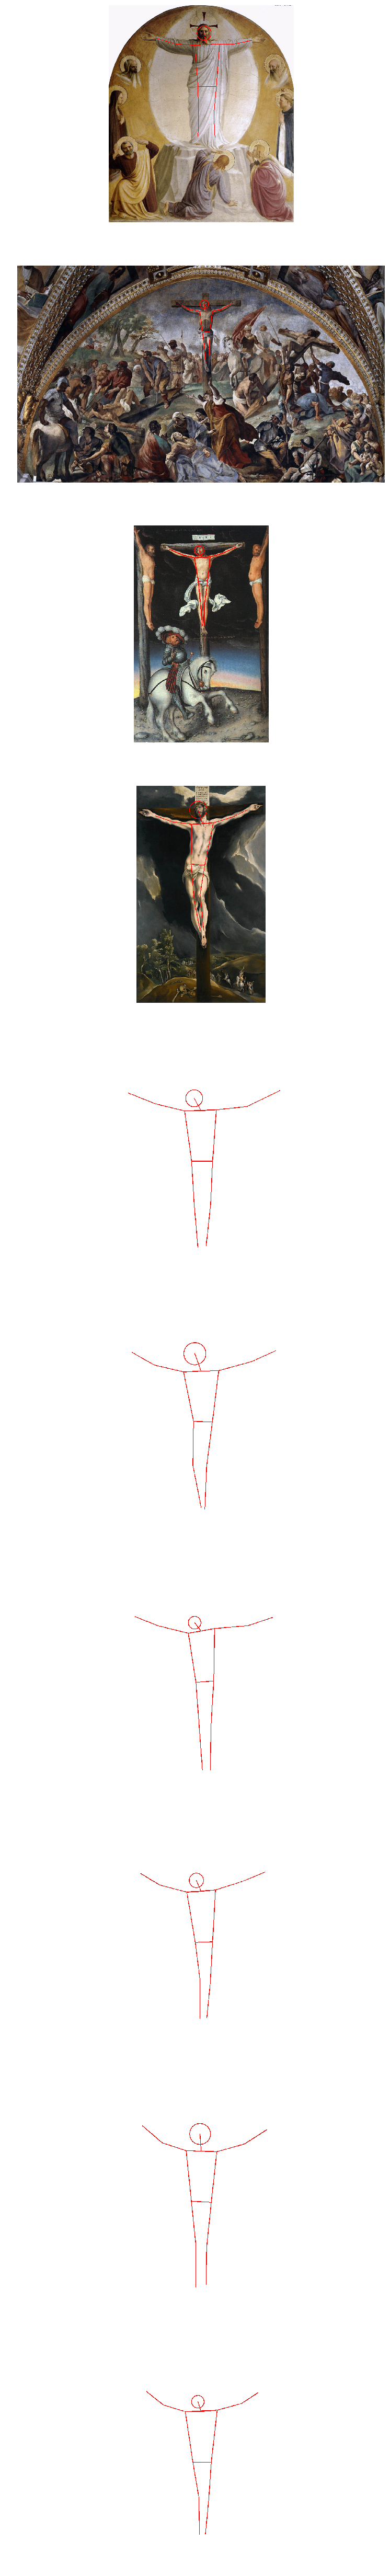

In [18]:
from PIL import Image
from StringIO import StringIO
import requests


def plot_hypothesis(b_id, n, bodies, resized_bodies, angles, paintings, deviation, approx=False):
    """plot the bodies found in a hypothesis"""
    body = bodies[b_id]
    if approx:
        tree = LSHForest().fit(angles)
        neighbors = bd.approximate_nearest_neighbors(n, body, deviation, tree)[0]
    else:
        tree = bd.pre_fit(angles, deviation, n=100, dist=50)
        neighbors = bd.nearest_neighbors(n, body, deviation, tree)[1][0]
    
    subpaintings = list()
    
    for i in neighbors:
        subpaintings.append(paintings[bodies[i].painting])
        
    
    
    f, ax = plt.subplots(n,1, figsize=(24,n * 9))
    for i in range(n):
        if i < 5:
            response = requests.get(subpaintings[i][1])
            try:
                img = np.array(Image.open(StringIO(response.content)))
                #print subpaintings[i][1]
                bodies[neighbors[i]].draw(img, (255,0,0))
            except:
                img = np.ones((1000,1000,3))
                resized_bodies[neighbors[i]].draw(img, (1,0,0))
        else:
            img = np.ones((1000,1000,3))
            resized_bodies[neighbors[i]].draw(img, (1,0,0))
        ax[i].imshow(img)
        ax[i].axis('off')
        
    plt.show()
    f.set_size_inches(10, 10)
    
plot_hypothesis(2659, 10, filtered_bodies, resized_bodies, all_relative_angles, filtered_paintings, deviation, approx=False)

painting http://www.wga.hu/art/f/ferrari/gaudenzi/crucifix.jpg failed being retreived, its id is: 8793


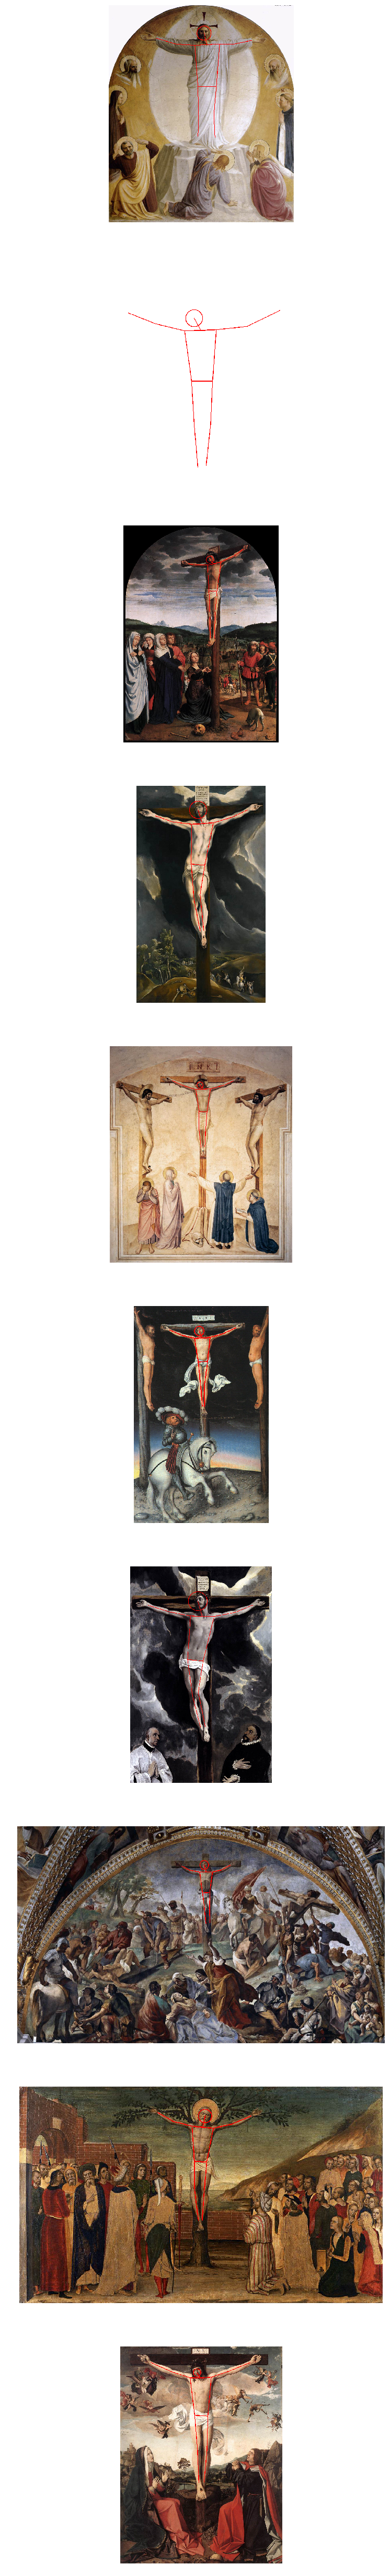

14.4719998837


In [21]:
def plot_research(body, n, bodies, angles, paintings, deviation, approx=False):
    """plot the bodies found in a hypothesis"""
    if approx:
        tree = LSHForest().fit(angles)
        neighbors = bd.approximate_nearest_neighbors(n, body, deviation, tree)[0]
    else:
        tree = bd.pre_fit(angles, deviation, n=100, dist=50)
        neighbors = nearest_neighbors(n, body, deviation, tree)[1][0]
    
    subpaintings = list()
    for i in neighbors:
        subpaintings.append(paintings[bodies[i].painting])
        
    
    
    f, ax = plt.subplots(n,1, figsize=(24,n * 9))
    for i in range(n):
        pid = subpaintings[i][1]
        response = requests.get(pid)
        try:
            img = np.array(Image.open(StringIO(response.content)))
            #print subpaintings[i][1]
            bodies[neighbors[i]].draw(img, (255,0,0))
        except:
            print 'painting '+str(pid)+' failed being retreived, its id is: '+str(bodies[neighbors[i]].painting)
            img = np.ones((1000,1000,3))
            resized_bodies[neighbors[i]].draw(img, (1,0,0))
        ax[i].imshow(img)
        ax[i].axis('off')
        
    plt.show()
    f.set_size_inches(10, 10)

t = time.time()
plot_research(base_body, 10, filtered_bodies, all_relative_angles, filtered_paintings, deviation, approx=True)
print (time.time() - t)